<a href="https://colab.research.google.com/github/MuhamedAdemi/Brainster-Python/blob/main/Muhamed_Ademi_Project_Task_2_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Task 2 - Air Pollution Scenario

## Scenario details

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matters of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

The data for this scenario can be taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled.

For each pollutant there is a separate dataset - CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv.

To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Questions to answer / Problems to solve

**Note:** Include explainations for all results you obtain and discuss the conclusions that can be drawn!

### Read the data from all 5 files and load that data into 5 separate dataframes. Then perform some exploatory analysis on each of the dataframes (get sense of the data) -- (2 points)

### Perform the appropriate preprocessing (include a brief description on the actions you chose to perform). Then concatanate all dataframes into one -- (3 points)

- Suggestions for preprocessing:
    - mobile feature details data for a station that is occasionally displaced, so this data can be dropped as it is not as accurate
    - splitting the datetime into date and time features
    - adding a type column for each dataframe indicating the type of the pollutant
    - .....


### Question: What location in Skopje has the highest average pollution for each of the pollutants? -- (2 points)

### Question: For every year, for each of the pollutants, what time stamp has the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? -- (2 points)

### Question: What month of the year has the highest average polution accross locations for each of the pollutants? -- (2 points)

### Question: What is the average pollution accross locations for every hour during the day?  -- (2 points)

### Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time -- (3 points)

### Question: On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate? -- (3 points)

Use the following table detailing the range of values for PM10 and their meaning:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

### Create a bar plot showing the average number of days when the measured value for PM10 was worse than moderate on at least one location -- (3 points)

### Add five additional visualizations of your own choosing that show some results that you were interested in seeing. What can you conclude about them? -- (3 points)

## Solution

In [1]:
!gdown 1AEhBI4vMRPcddJTq499lNcn3_koDimDU

Downloading...
From: https://drive.google.com/uc?id=1AEhBI4vMRPcddJTq499lNcn3_koDimDU
To: /content/PM25.csv
100% 2.31M/2.31M [00:00<00:00, 69.7MB/s]


In [2]:
!gdown 1f8zQWhPOl5a2BiXTxXkl8X6f04k9yZXd

Downloading...
From: https://drive.google.com/uc?id=1f8zQWhPOl5a2BiXTxXkl8X6f04k9yZXd
To: /content/PM10.csv
100% 3.22M/3.22M [00:00<00:00, 27.1MB/s]


In [3]:
!gdown 1kqaNEo8yFMV-U8gbMf2bvxncdsVW6plq

Downloading...
From: https://drive.google.com/uc?id=1kqaNEo8yFMV-U8gbMf2bvxncdsVW6plq
To: /content/O3.csv
100% 2.96M/2.96M [00:00<00:00, 74.2MB/s]


In [4]:
!gdown 1NMPZOpamkRRMRiauC-0837yVjdGrL7AG

Downloading...
From: https://drive.google.com/uc?id=1NMPZOpamkRRMRiauC-0837yVjdGrL7AG
To: /content/NO2.csv
100% 2.88M/2.88M [00:00<00:00, 104MB/s]


In [5]:
!gdown 1laCr1kr7MStLLOuI1o6_m8z75MWFp5In

Downloading...
From: https://drive.google.com/uc?id=1laCr1kr7MStLLOuI1o6_m8z75MWFp5In
To: /content/CO.csv
100% 2.95M/2.95M [00:00<00:00, 118MB/s]


In [6]:
# Import the required libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For advanced visualizations


In [7]:


# Step 2: Load datasets for different pollutants
file_paths = {
    'CO': '/content/CO.csv',    # Carbon Monoxide dataset
    'NO2': '/content/NO2.csv',  # Nitrogen Dioxide dataset
    'O3': '/content/O3.csv',    # Ozone dataset
    'PM10': '/content/PM10.csv', # Particulate Matter <10µm
    'PM25': '/content/PM25.csv'  # Particulate Matter <2.5µm
}

datasets = {}
for pollutant, file in file_paths.items():
    datasets[pollutant] = pd.read_csv(file)

"""
Each pollutant dataset is read from a CSV file and stored in a dictionary with the pollutant name
as the key. This allows us to manage multiple datasets efficiently.
"""

'\nEach pollutant dataset is read from a CSV file and stored in a dictionary with the pollutant name\nas the key. This allows us to manage multiple datasets efficiently.\n'

In [8]:
# Step 3: Display the first few rows of each dataset
for pollutant, df in datasets.items():
    print(f"\nDataset for {pollutant}:\n", df.head())

"""
This step prints a preview of each dataset to understand its structure and identify any irregularities.
"""


Dataset for CO:
    Unnamed: 0.1  Unnamed: 0  Centar  GaziBaba  Karpos  Lisice  Miladinovci  \
0         36212       36212  0.2876    0.9219  0.5644     NaN          NaN   
1         36213       36213  0.1538    1.2029  0.8275     NaN       0.3858   
2         36214       36214  0.1600    1.3198  0.7423     NaN       0.3346   
3         36215       36215  0.1699    1.1449  0.4445     NaN       0.3549   
4         36216       36216  0.1539    0.8092  0.5121     NaN       0.2553   

   Mobile  Rektorat                 time  
0     NaN    0.3708  2012-01-01 00:00:00  
1     NaN    0.4097  2012-01-01 01:00:00  
2     NaN    0.4061  2012-01-01 02:00:00  
3     NaN    0.6500  2012-01-01 03:00:00  
4     NaN    0.7198  2012-01-01 04:00:00  

Dataset for NO2:
    Unnamed: 0.1  Unnamed: 0   Centar  GaziBaba   Karpos   Lisice  Miladinovci  \
0         36212       36212  27.5615       NaN  31.1979  40.2691          NaN   
1         36213       36213  16.1041       NaN  34.4904  33.3520          

'\nThis step prints a preview of each dataset to understand its structure and identify any irregularities.\n'

In [9]:
# Step 4: Clean and standardize the data
for pollutant, df in datasets.items():
    # Drop unnecessary columns like "Unnamed: 0" and "Unnamed: 0.1"
    df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')

    # Drop the 'Mobile' column if it exists and contains only NaN values
    if 'Mobile' in df.columns and df['Mobile'].isna().all():
        df = df.drop(columns=['Mobile'])

    # Convert the 'time' column to datetime format
    df['time'] = pd.to_datetime(df['time'])

    # Add a column for pollutant type
    df['Pollutant'] = pollutant

    # Update the dataset with the cleaned DataFrame
    datasets[pollutant] = df

"""
This step removes redundant columns, ensures that the 'time' column is in datetime format for time-series analysis,
adds a 'Pollutant' column to differentiate datasets when combined, and removes the 'Mobile' column if it contains only missing values.
"""


"\nThis step removes redundant columns, ensures that the 'time' column is in datetime format for time-series analysis,\nadds a 'Pollutant' column to differentiate datasets when combined, and removes the 'Mobile' column if it contains only missing values.\n"

In [10]:
# Step 5: Combine all datasets into one
all_data = pd.concat(datasets.values(), ignore_index=True)

"""
We merge all pollutant datasets into a single DataFrame. This facilitates analysis across all pollutants.
"""


'\nWe merge all pollutant datasets into a single DataFrame. This facilitates analysis across all pollutants.\n'

In [ ]:
# Step 6: Handle missing values
missing_columns = all_data.columns[all_data.isnull().any()]

for col in missing_columns:
    if all_data[col].dtype in ['float64', 'int64']:
        # Fill numeric missing values with column mean
        all_data[col].fillna(all_data[col].mean(), inplace=True)

"""
Missing values in numeric columns are filled with the column mean. This avoids errors during statistical analysis.
"""


<ipython-input-11-d42d250a11e2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(all_data[col].mean(), inplace=True)


'\nMissing values in numeric columns are filled with the column mean. This avoids errors during statistical analysis.\n'

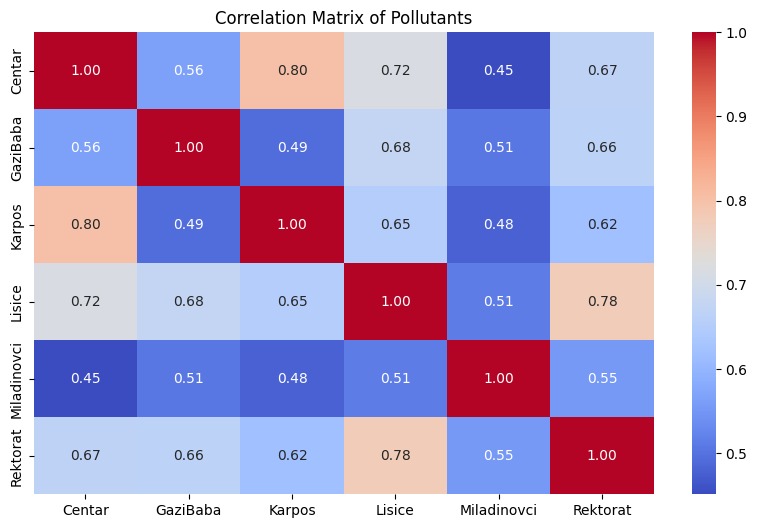

'\nThis step calculates and visualizes correlations between pollutant concentrations at different locations.\nThe heatmap highlights strong positive or negative correlations.\n'

In [ ]:
# Step 7: Analyze correlations between pollutants
pollutant_columns = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci',  'Rektorat']

correlation_matrix = all_data[pollutant_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Pollutants")
plt.show()

"""
This step calculates and visualizes correlations between pollutant concentrations at different locations.
The heatmap highlights strong positive or negative correlations.
"""



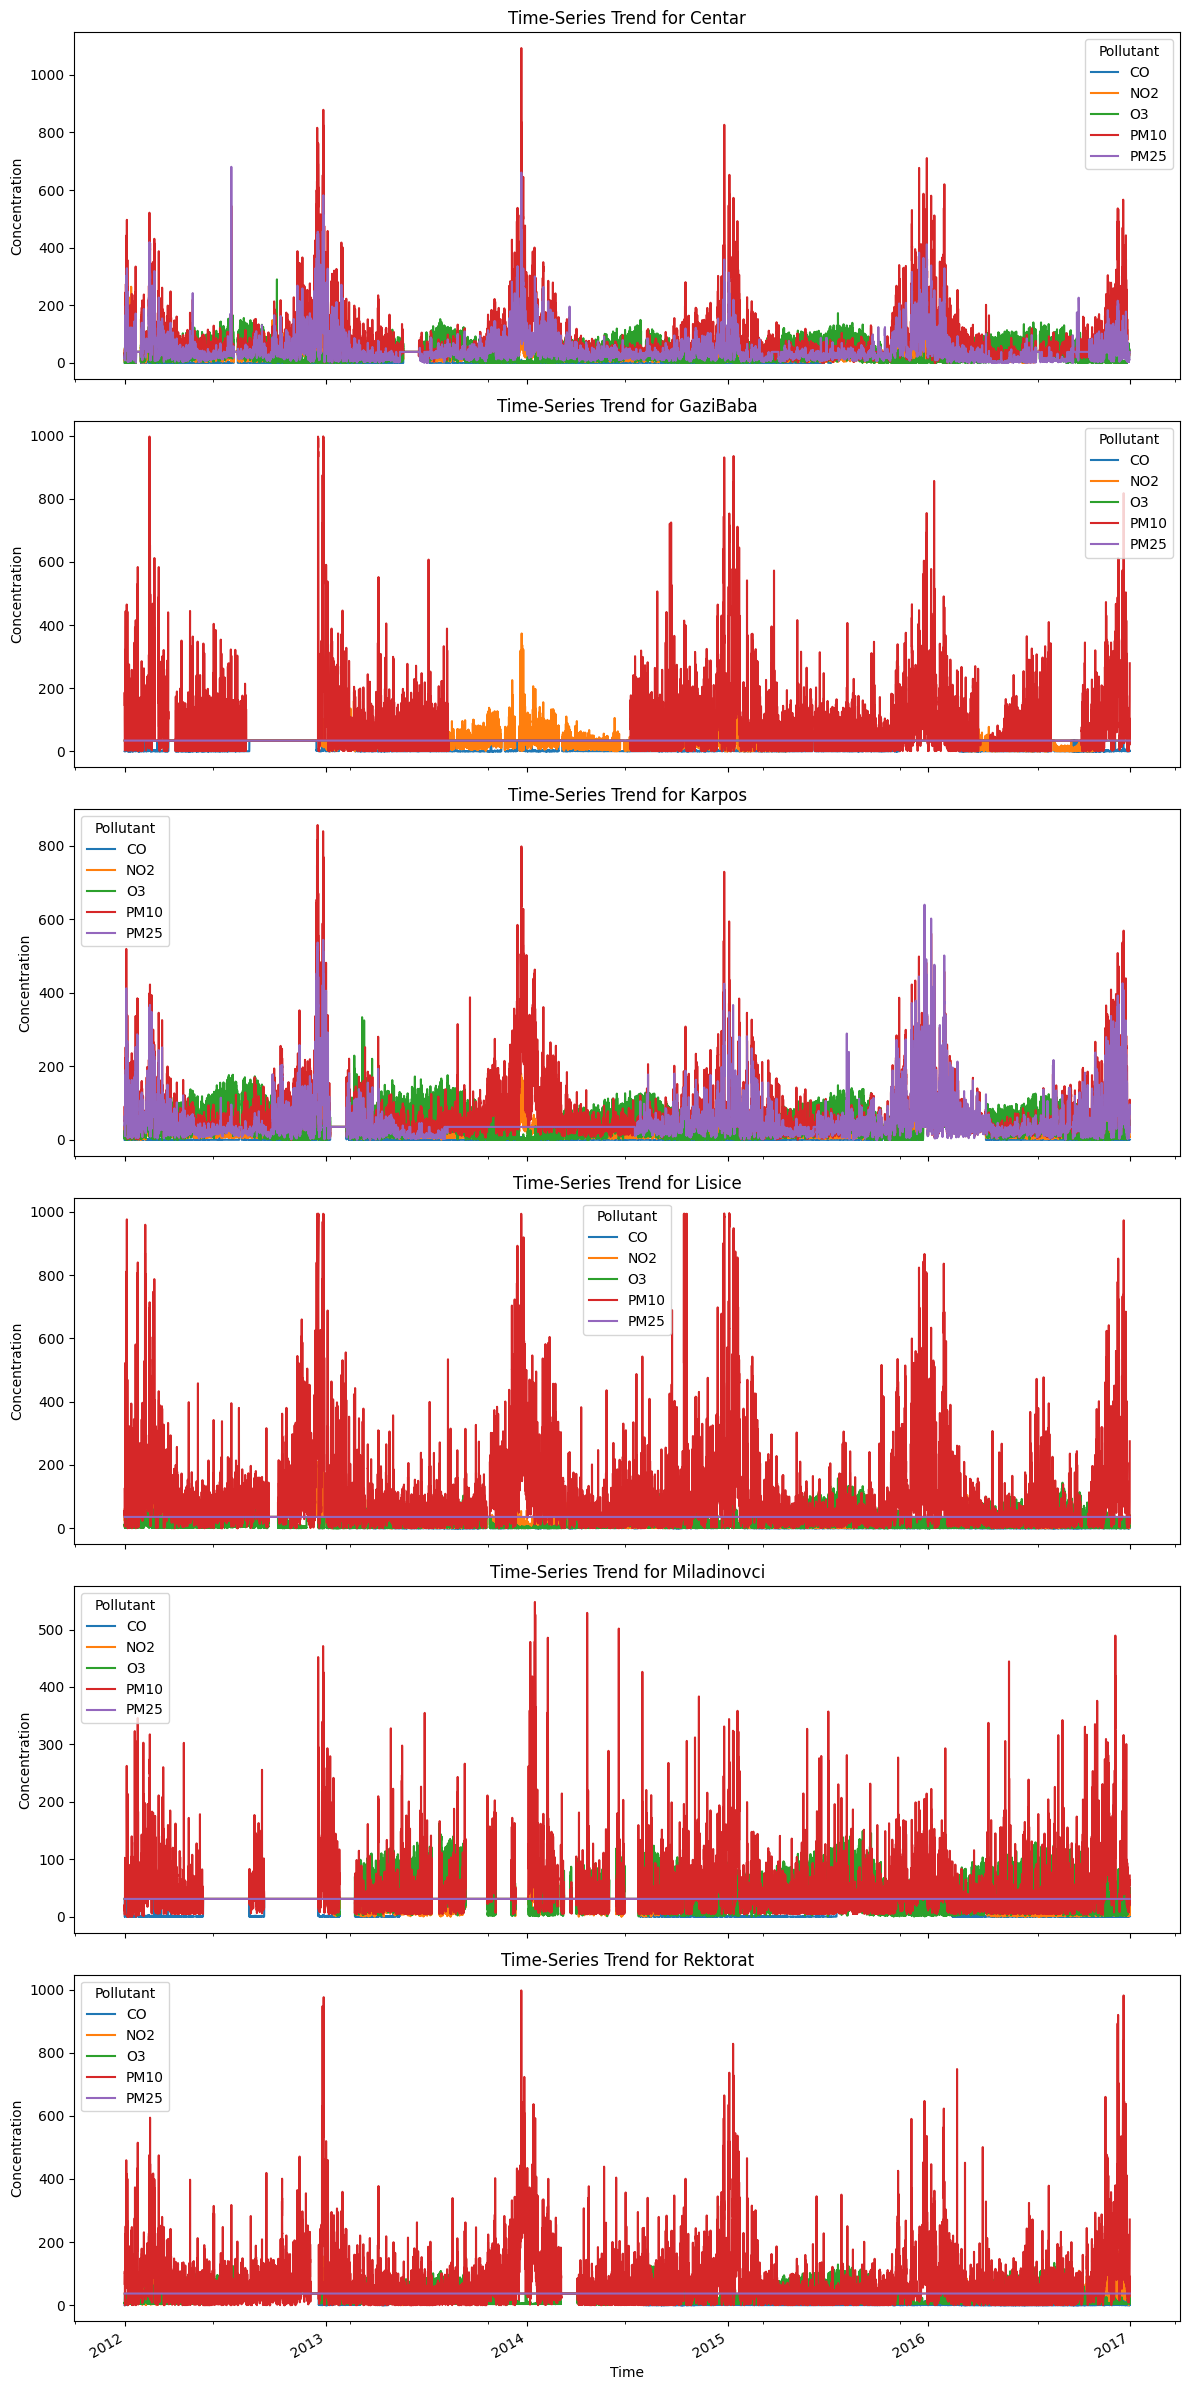

In [ ]:
# Lista e lokacioneve
pollutant_columns = ['Centar', 'GaziBaba', 'Karpos', 'Lisice', 'Miladinovci', 'Rektorat']

# Grupimi dhe marrja e mesatares
grouped_data = all_data.groupby(['time', 'Pollutant'])[pollutant_columns].mean()

# Krijimi i subplots
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(12, len(pollutant_columns) * 4), sharex=True)

for i, location in enumerate(pollutant_columns):
    grouped_data[location].unstack().plot(ax=axes[i])
    axes[i].set_title(f"Time-Series Trend for {location}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Concentration")
    axes[i].legend(title="Pollutant")

plt.tight_layout()
plt.show()


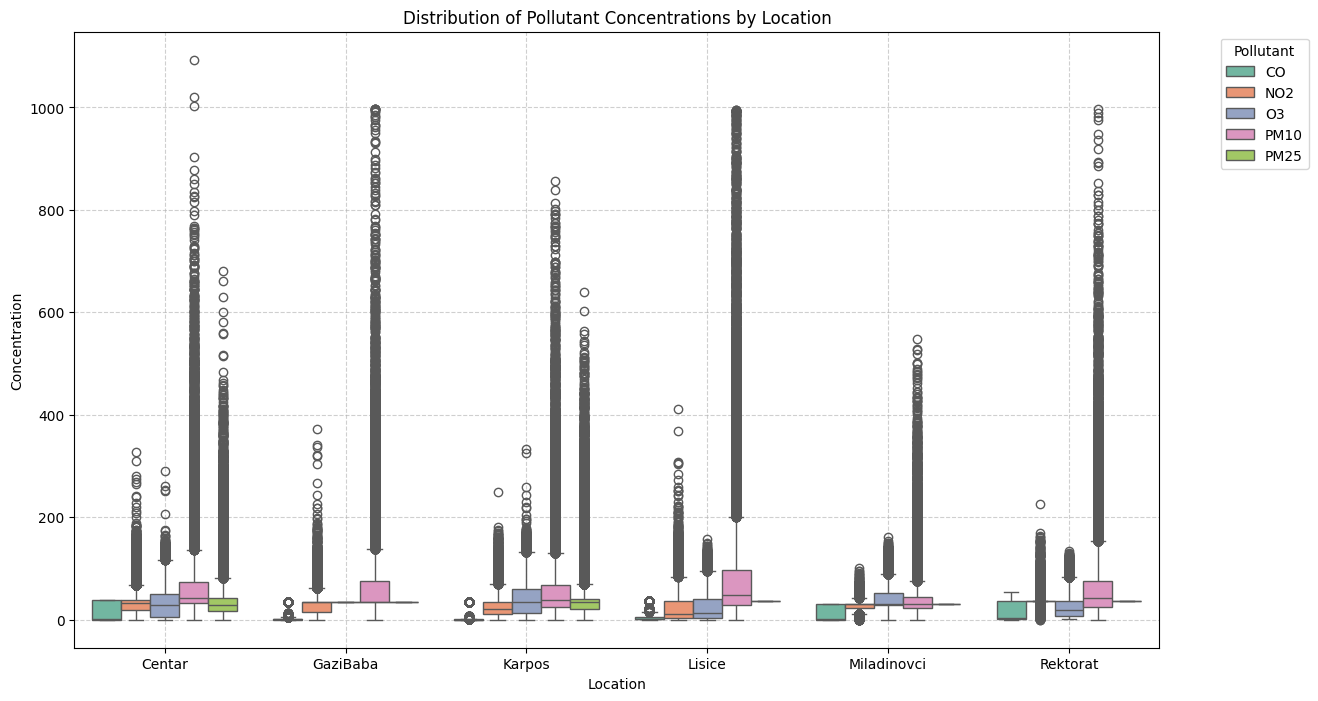

In [ ]:

melted_data = grouped_data.reset_index().melt(id_vars=['time', 'Pollutant'],
                                               value_vars=pollutant_columns,
                                               var_name='Location',
                                               value_name='Concentration')

# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x='Location', y='Concentration', hue='Pollutant', palette="Set2")
plt.title("Distribution of Pollutant Concentrations by Location")
plt.xlabel("Location")
plt.ylabel("Concentration")
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


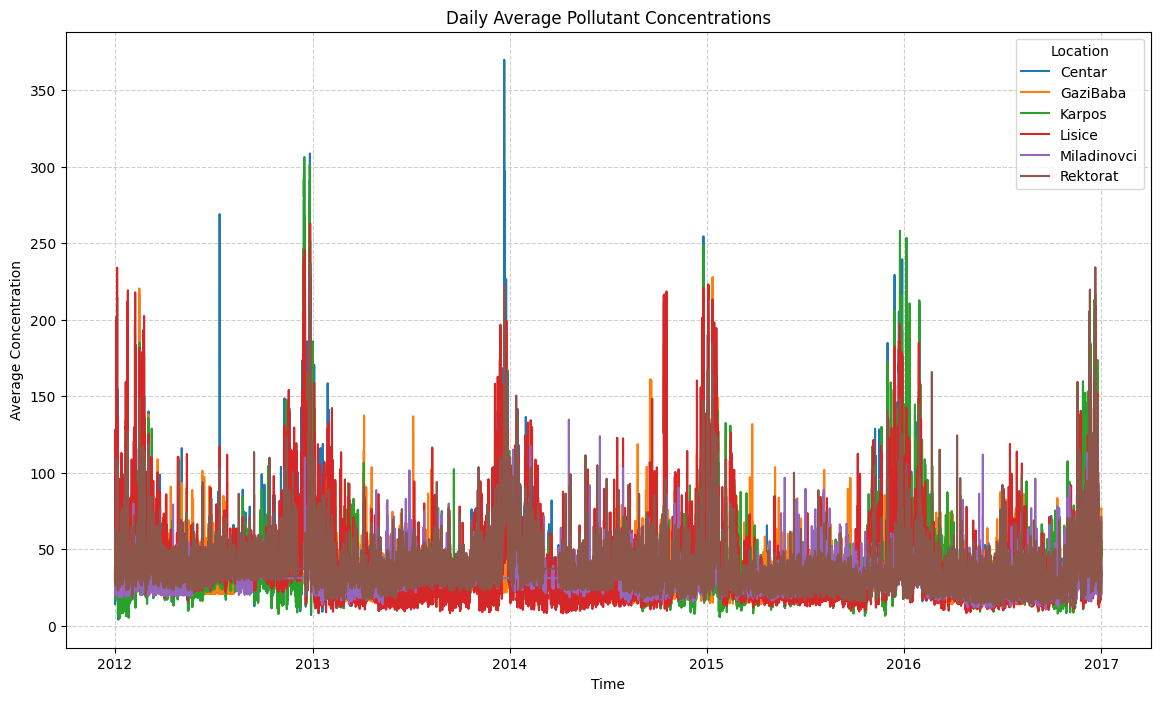

In [ ]:

daily_avg = all_data.groupby(['time'])[pollutant_columns].mean()

plt.figure(figsize=(14, 8))
for location in pollutant_columns:
    plt.plot(daily_avg.index, daily_avg[location], label=location)

plt.title("Daily Average Pollutant Concentrations")
plt.xlabel("Time")
plt.ylabel("Average Concentration")
plt.legend(title="Location")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


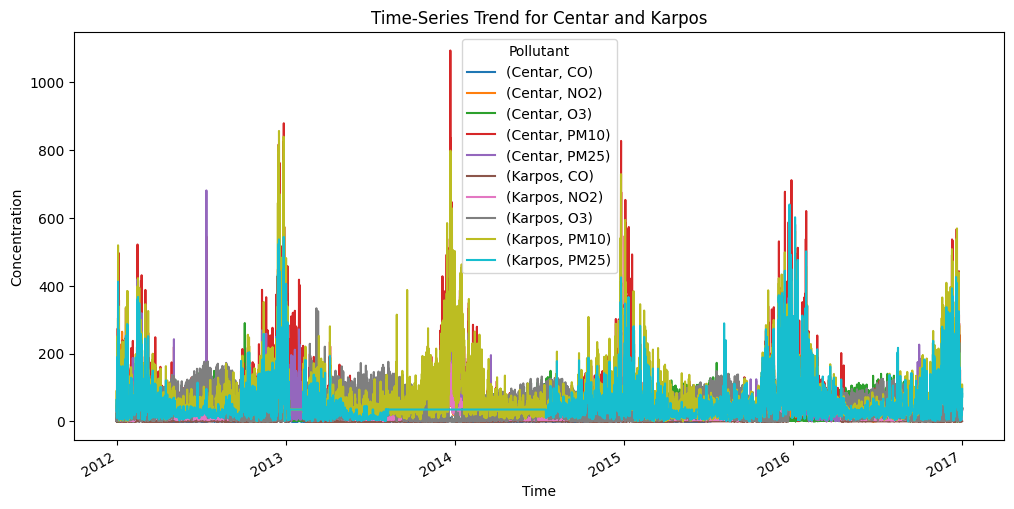

"\nHere, we visualize how pollutant concentrations at 'Centar' and 'Karpos' locations vary over time.\nThe line plot helps observe seasonal trends or anomalies.\n"

In [ ]:
# Step 8: Create time-series trends
all_data.groupby(['time', 'Pollutant'])[['Centar', 'Karpos']].mean().unstack().plot(figsize=(12, 6))
plt.title("Time-Series Trend for Centar and Karpos")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(title="Pollutant")
plt.show()

"""
Here, we visualize how pollutant concentrations at 'Centar' and 'Karpos' locations vary over time.
The line plot helps observe seasonal trends or anomalies.
"""

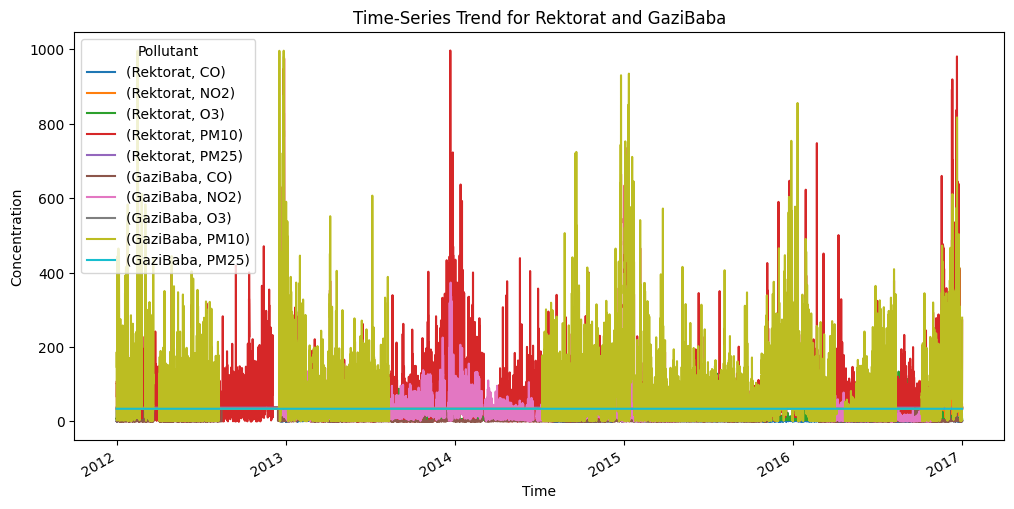

"\nHere, we visualize how pollutant concentrations at 'Rektorat' and 'GaziBaba' locations vary over time.\nThe line plot helps observe seasonal trends or anomalies.\n"

In [ ]:
# Step 8: Create time-series trends
all_data.groupby(['time', 'Pollutant'])[['Rektorat', 'GaziBaba' ]].mean().unstack().plot(figsize=(12, 6))
plt.title("Time-Series Trend for Rektorat and GaziBaba")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(title="Pollutant")
plt.show()

"""
Here, we visualize how pollutant concentrations at 'Rektorat' and 'GaziBaba' locations vary over time.
The line plot helps observe seasonal trends or anomalies.
"""

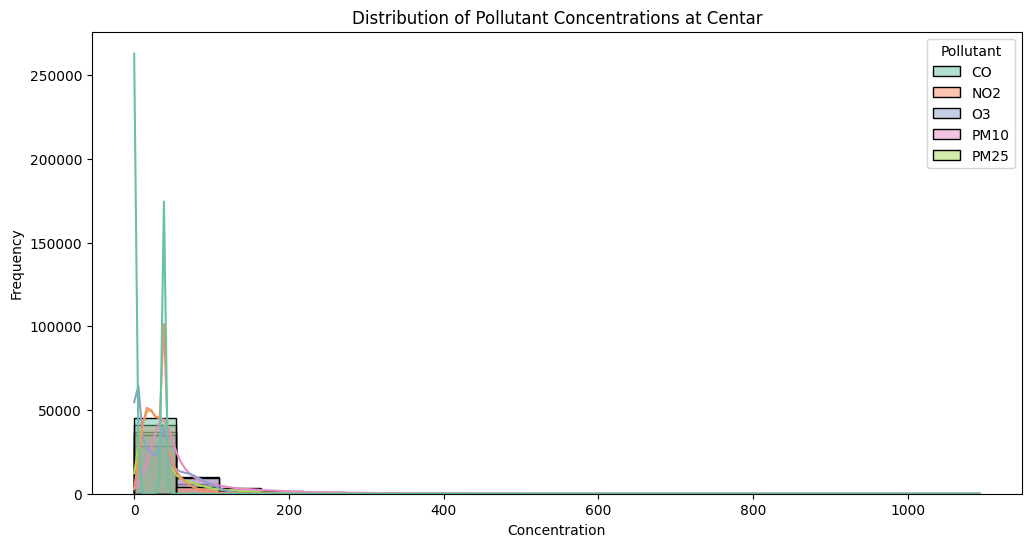

"\nThis histogram displays the distribution of pollutant concentrations at the 'Centar' location,\ndifferentiated by pollutant type. The KDE curve shows the probability density.\n"

In [ ]:
# Step 9: Display pollutant concentration distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x='Centar', hue='Pollutant', kde=True, bins=20, palette="Set2")
plt.title("Distribution of Pollutant Concentrations at Centar")
plt.xlabel("Concentration")
plt.ylabel("Frequency")
plt.show()

"""
This histogram displays the distribution of pollutant concentrations at the 'Centar' location,
differentiated by pollutant type. The KDE curve shows the probability density.
"""

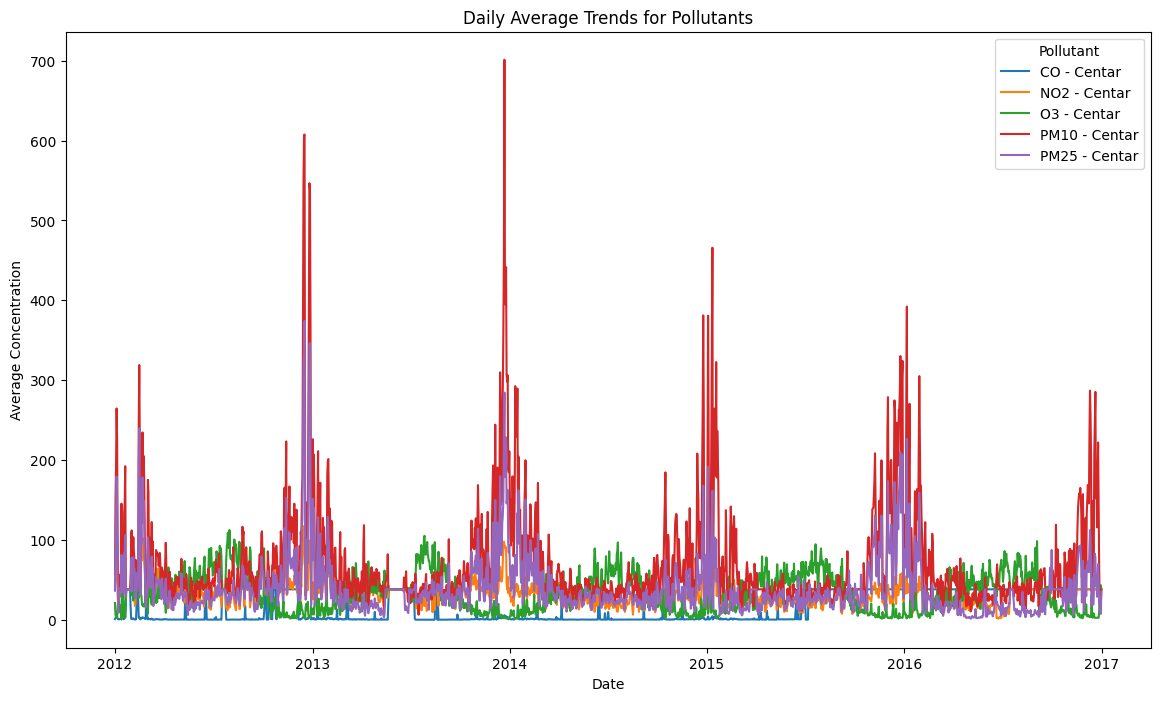

'\nThis plot answers the question about daily average pollution trends over time.\n'

In [ ]:
# Step 9: Daily pollution averages visualization
daily_avg = all_data.groupby([all_data['time'].dt.date, 'Pollutant'])[pollutant_columns].mean().reset_index()

plt.figure(figsize=(14, 8))
for pollutant in daily_avg['Pollutant'].unique():
    subset = daily_avg[daily_avg['Pollutant'] == pollutant]
    plt.plot(subset['time'], subset['Centar'], label=f"{pollutant} - Centar")

plt.title("Daily Average Trends for Pollutants")
plt.xlabel("Date")
plt.ylabel("Average Concentration")
plt.legend(title="Pollutant")
plt.show()

"""
This plot answers the question about daily average pollution trends over time.
"""


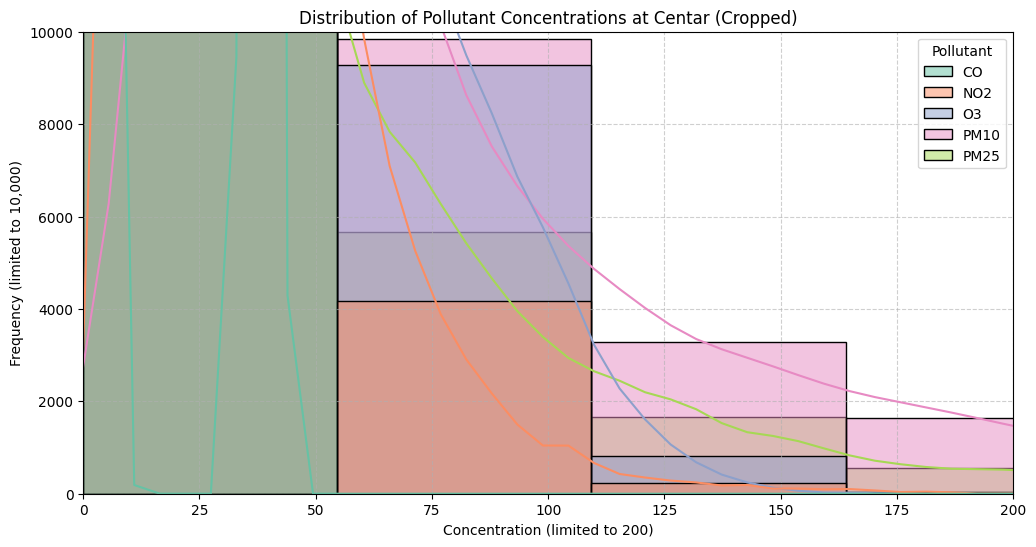

Summary of Pollutant Concentrations at Centar:
count    226535.000000
mean         38.122948
std          45.810865
min           0.000000
25%          12.287800
50%          33.177200
75%          42.875500
max        1093.080000
Name: Centar, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Krijimi i histogramit me kufizim të diapazonit
plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_data,
    x='Centar',
    hue='Pollutant',
    kde=True,
    bins=20,
    palette="Set2"
)
plt.title("Distribution of Pollutant Concentrations at Centar (Cropped)")
plt.xlabel("Concentration (limited to 200)")
plt.ylabel("Frequency (limited to 10,000)")
plt.xlim(0, 200)  # Kufizim në vlerat e koncentrimit
plt.ylim(0, 10000)  # Kufizim në vlerat e frekuencës
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Përmbledhje numerike për vlerat reale
real_values_summary = all_data['Centar'].describe()
print("Summary of Pollutant Concentrations at Centar:")
print(real_values_summary)


In [ ]:
# Step 10: Calculate daily averages for each pollutant
daily_data = all_data.groupby([all_data['time'].dt.date, 'Pollutant'])[['Centar', 'Karpos']].mean().reset_index()

"""
This step groups the data by date and pollutant type, calculating the daily average concentration
for 'Centar' and 'Karpos'. This is useful for identifying daily trends.
"""

"\nThis step groups the data by date and pollutant type, calculating the daily average concentration\nfor 'Centar' and 'Karpos'. This is useful for identifying daily trends.\n"

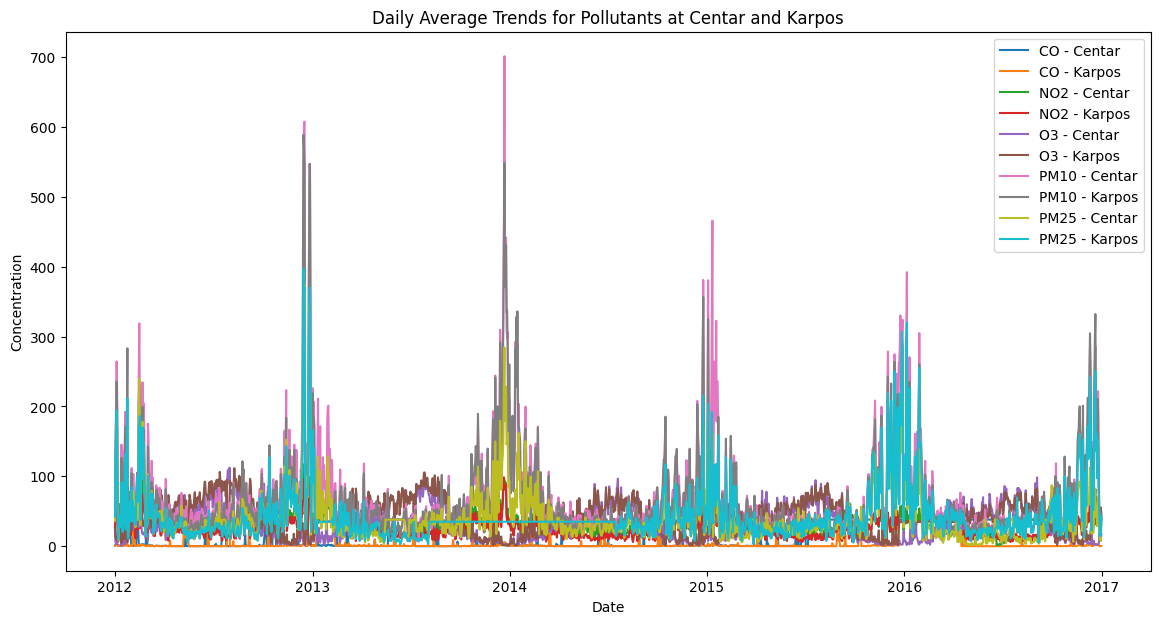

"\nThis plot visualizes daily average trends for each pollutant at 'Centar' and 'Karpos'.\nIt helps identify longer-term patterns and potential seasonal effects.\n"

In [ ]:
# Step 11: Visualize daily average trends
plt.figure(figsize=(14, 7))
for pollutant in daily_data['Pollutant'].unique():
    subset = daily_data[daily_data['Pollutant'] == pollutant]
    plt.plot(subset['time'], subset['Centar'], label=f"{pollutant} - Centar")
    plt.plot(subset['time'], subset['Karpos'], label=f"{pollutant} - Karpos")


plt.title("Daily Average Trends for Pollutants at Centar and Karpos")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.show()

"""
This plot visualizes daily average trends for each pollutant at 'Centar' and 'Karpos'.
It helps identify longer-term patterns and potential seasonal effects.
"""

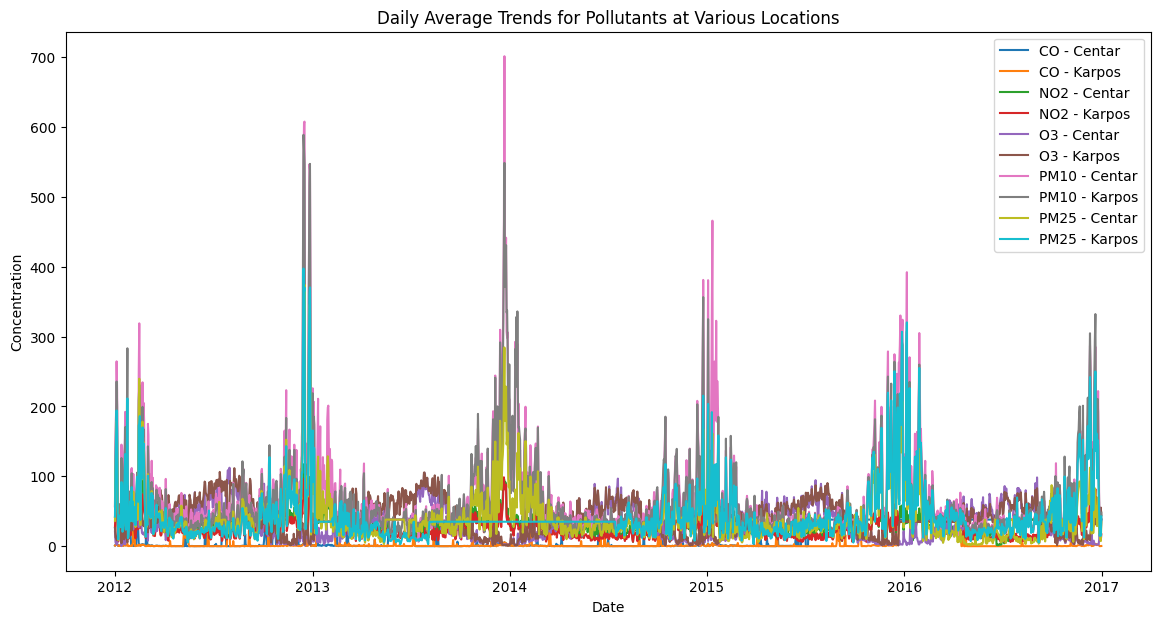

In [ ]:
# Step 11: Visualize daily average trends
plt.figure(figsize=(14, 7))

# Define the list of locations you want to plot
locations = ['Centar', 'Karpos', 'GaziBaba', 'Rektorat']

# Loop through each pollutant
for pollutant in daily_data['Pollutant'].unique():
    # Filter data for the current pollutant
    subset = daily_data[daily_data['Pollutant'] == pollutant]
    # Loop through each location and plot its data
    for location in locations:
        if location in subset.columns:
            plt.plot(subset['time'], subset[location], label=f"{pollutant} - {location}")

# Set plot title and labels
plt.title("Daily Average Trends for Pollutants at Various Locations")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.show()


In [ ]:
# Step 12: Identify peak pollution periods
thresholds = {
    "CO": 1.0,
    "NO2": 40.0,
    "O3": 50.0,
    "PM10": 50.0,
    "PM25": 25.0
}

all_data['Above_Threshold'] = all_data.apply(
    lambda row: row[pollutant_columns].mean() > thresholds[row['Pollutant']], axis=1
)

"""
This step adds a boolean column 'Above_Threshold' that indicates whether the average pollutant
concentration exceeds a predefined threshold for health safety.
"""


"\nThis step adds a boolean column 'Above_Threshold' that indicates whether the average pollutant\nconcentration exceeds a predefined threshold for health safety.\n"

In [ ]:
# Step 13: Count occurrences of exceedance for each pollutant
exceedance_counts = all_data[all_data['Above_Threshold']].groupby('Pollutant').size()
print("Exceedance counts by pollutant:\n", exceedance_counts)

"""
Here, we calculate how many times the average concentration of a pollutant exceeded the threshold.
This helps assess which pollutants are more problematic in terms of air quality.
"""


Exceedance counts by pollutant:
 Pollutant
CO      39232
NO2      4759
O3       9381
PM10    19467
PM25    44770
dtype: int64


'\nHere, we calculate how many times the average concentration of a pollutant exceeded the threshold.\nThis helps assess which pollutants are more problematic in terms of air quality.\n'

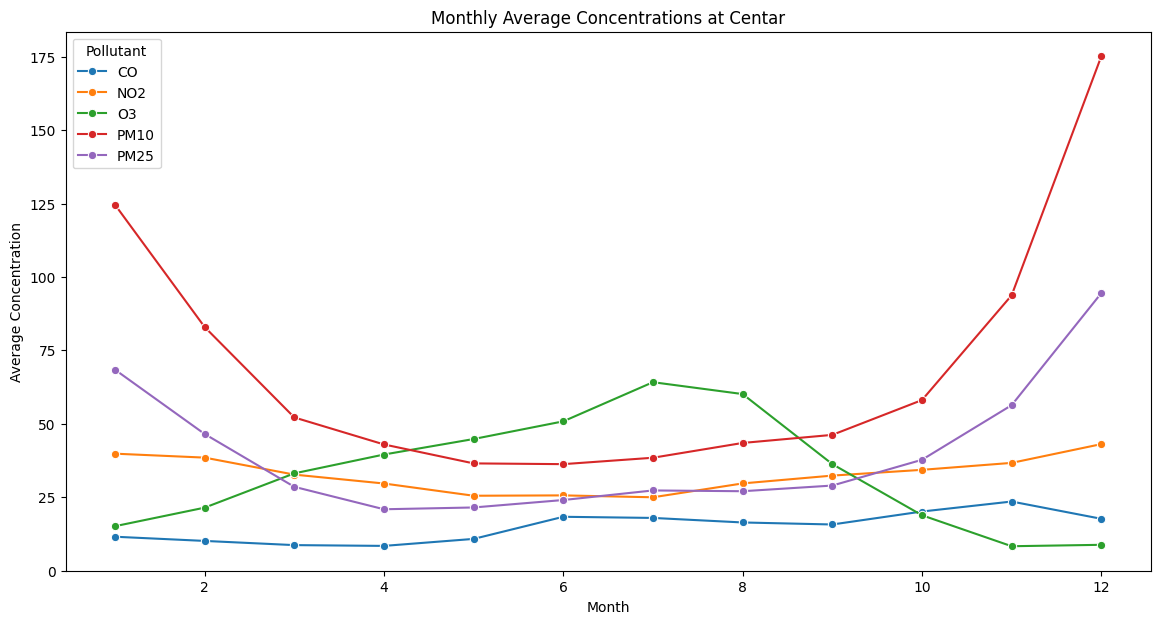

'\nThis analysis identifies how concentrations vary across months. It is useful for understanding\nseasonal effects, such as increased pollution during winter due to heating.\n'

In [ ]:
# Step 14: Analyze seasonal variations
all_data['Month'] = all_data['time'].dt.month
monthly_means = all_data.groupby(['Month', 'Pollutant'])[['Centar', 'Karpos']].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_means, x='Month', y='Centar', hue='Pollutant', marker="o")
plt.title("Monthly Average Concentrations at Centar")
plt.xlabel("Month")
plt.ylabel("Average Concentration")
plt.legend(title="Pollutant")
plt.show()

"""
This analysis identifies how concentrations vary across months. It is useful for understanding
seasonal effects, such as increased pollution during winter due to heating.
"""

<Figure size 1200x600 with 0 Axes>

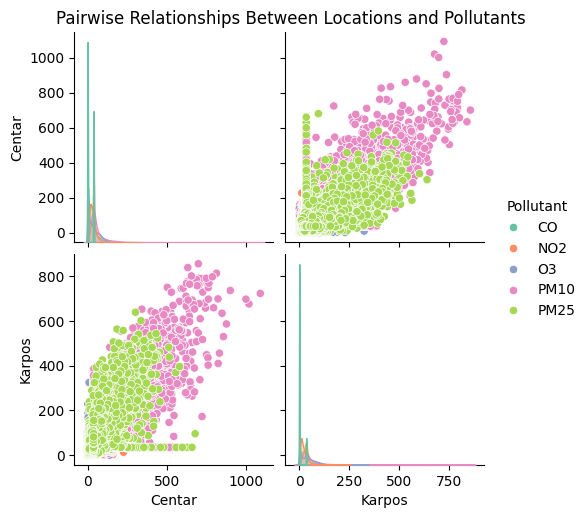

'\nScatter plots and KDEs allow us to explore relationships between pollutant concentrations\nat different locations. This may reveal co-pollution or independent pollution behaviors.\n'

In [ ]:
# Step 15: Create scatter plots to explore relationships between pollutants
plt.figure(figsize=(12, 6))
sns.pairplot(all_data, vars=['Centar', 'Karpos'], hue='Pollutant', palette="Set2", diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Locations and Pollutants", y=1.02)
plt.show()

"""
Scatter plots and KDEs allow us to explore relationships between pollutant concentrations
at different locations. This may reveal co-pollution or independent pollution behaviors.
"""

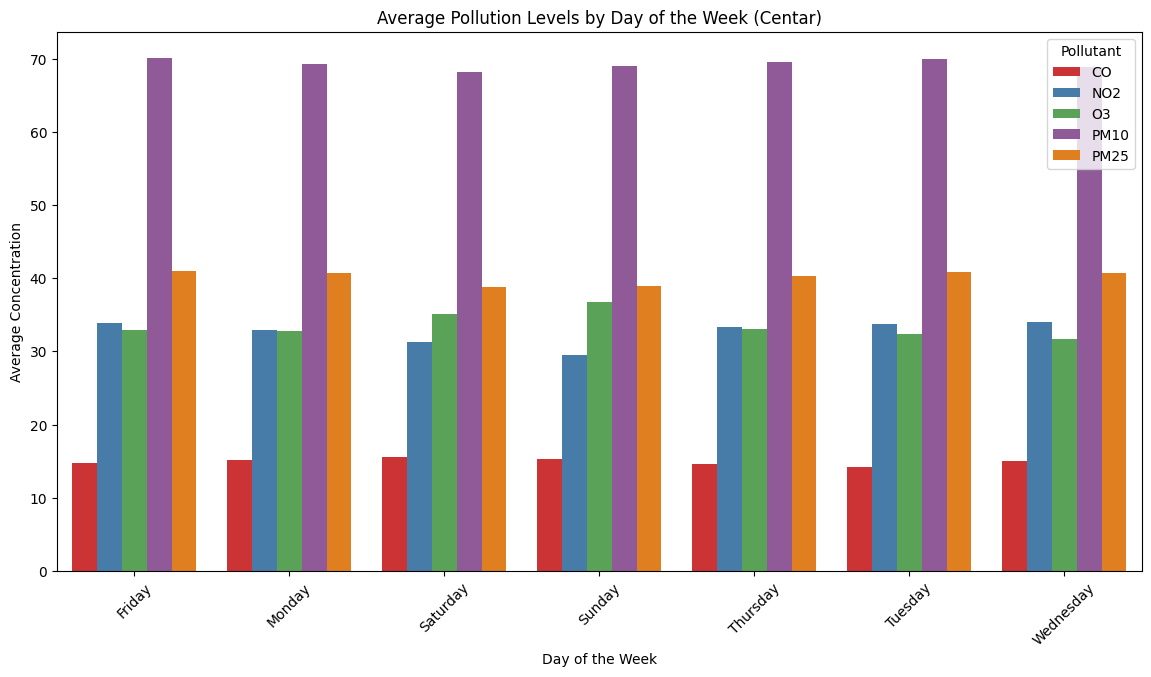

"\nHere, we analyze how pollution varies by the day of the week at the 'Centar' location.\nIt helps identify patterns such as higher pollution on weekdays due to traffic.\n"

In [ ]:
# Step 16: Evaluate pollution patterns by day of the week
all_data['DayOfWeek'] = all_data['time'].dt.day_name()
weekday_means = all_data.groupby(['DayOfWeek', 'Pollutant'])[['Centar', 'Karpos']].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=weekday_means, x='DayOfWeek', y='Centar', hue='Pollutant', palette="Set1")
plt.title("Average Pollution Levels by Day of the Week (Centar)")
plt.xlabel("Day of the Week")
plt.ylabel("Average Concentration")
plt.xticks(rotation=45)
plt.legend(title="Pollutant")
plt.show()

"""
Here, we analyze how pollution varies by the day of the week at the 'Centar' location.
It helps identify patterns such as higher pollution on weekdays due to traffic.
"""


In [ ]:
# Step 17: Save the cleaned dataset
all_data.to_csv("cleaned_air_pollution_data.csv", index=False)

"""
Finally, the cleaned and processed dataset is saved as a new CSV file for future use.
This ensures that the preprocessing work doesn't need to be repeated.
"""

"\nFinally, the cleaned and processed dataset is saved as a new CSV file for future use.\nThis ensures that the preprocessing work doesn't need to be repeated.\n"